In [2]:

import numpy as np 
import pandas as pd 
import matplotlib
import seaborn as sns
import sklearn
import imblearn
import matplotlib.pyplot as plt
import time
import sklearn.metrics as m
import xgboost as xgb



In [22]:

cols = [' Bwd Packet Length Std',' PSH Flag Count',' min_seg_size_forward',' Min Packet Length',' ACK Flag Count',' Bwd Packet Length Min',' Fwd IAT Std','Init_Win_bytes_forward',' Flow IAT Max',' Bwd Packets/s',' URG Flag Count','Bwd IAT Total',' Label']
df1=pd.read_csv("/content/drive/MyDrive/IDS2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv", usecols = cols)
df2=pd.read_csv("/content/drive/MyDrive/IDS2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv", usecols = cols)
df3=pd.read_csv("/content/drive/MyDrive/IDS2017/Friday-WorkingHours-Morning.pcap_ISCX.csv", usecols = cols)
#df5=pd.read_csv("/content/drive/MyDrive/IDS2017/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv", usecols = cols)
df6=pd.read_csv("/content/drive/MyDrive/IDS2017/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv", usecols = cols)

In [18]:
df1.shape


(225745, 13)

In [23]:
data.head()

,Bwd Packet Length Min,Bwd Packet Length Std,Flow IAT Max,Fwd IAT Std,Bwd IAT Total,Bwd Packets/s,Min Packet Length,PSH Flag Count,ACK Flag Count,URG Flag Count,Init_Win_bytes_forward,min_seg_size_forward,Label
0,0,0.0,3,0.0,0,0.000000,6,0,1,0,33,20,BENIGN
1,6,0.0,109,0.0,0,9174.311927,6,0,1,1,29,20,BENIGN
2,6,0.0,52,0.0,0,19230.769230,6,0,1,1,29,20,BENIGN
3,6,0.0,34,0.0,0,29411.764710,6,0,1,1,31,20,BENIGN
4,0,0.0,3,0.0,0,0.000000,6,0,1,0,32,20,BENIGN


In [24]:
df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
df = pd.concat([df,df6])
del df6

data = df.copy()



In [25]:
data.shape

(873611, 13)

In [26]:
data[' Label'].value_counts()


BENIGN                        582508
PortScan                      158930
DDoS                          128027
Bot                             1966
Web Attack � Brute Force        1507
Web Attack � XSS                 652
Web Attack � Sql Injection        21
Name:  Label, dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873611 entries, 0 to 170365
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0    Bwd Packet Length Min  873611 non-null  int64  
 1    Bwd Packet Length Std  873611 non-null  float64
 2    Flow IAT Max           873611 non-null  int64  
 3    Fwd IAT Std            873611 non-null  float64
 4   Bwd IAT Total           873611 non-null  int64  
 5    Bwd Packets/s          873611 non-null  float64
 6    Min Packet Length      873611 non-null  int64  
 7    PSH Flag Count         873611 non-null  int64  
 8    ACK Flag Count         873611 non-null  int64  
 9    URG Flag Count         873611 non-null  int64  
 10  Init_Win_bytes_forward  873611 non-null  int64  
 11   min_seg_size_forward   873611 non-null  int64  
 12   Label                  873611 non-null  object 
dtypes: float64(3), int64(9), object(1)
memory usage: 93.3+ MB


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873611 entries, 0 to 170365
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0    Bwd Packet Length Min  873611 non-null  int64  
 1    Bwd Packet Length Std  873611 non-null  float64
 2    Flow IAT Max           873611 non-null  int64  
 3    Fwd IAT Std            873611 non-null  float64
 4   Bwd IAT Total           873611 non-null  int64  
 5    Bwd Packets/s          873611 non-null  float64
 6    Min Packet Length      873611 non-null  int64  
 7    PSH Flag Count         873611 non-null  int64  
 8    ACK Flag Count         873611 non-null  int64  
 9    URG Flag Count         873611 non-null  int64  
 10  Init_Win_bytes_forward  873611 non-null  int64  
 11   min_seg_size_forward   873611 non-null  int64  
 12   Label                  873611 non-null  object 
dtypes: float64(3), int64(9), object(1)
memory usage: 93.3+ MB


In [29]:
for column in data.columns:
    if data[column].dtype == np.int64:
        maxVal = data[column].max()
        if maxVal < 120:
            data[column] = data[column].astype(np.int8)
        elif maxVal < 32767:
            data[column] = data[column].astype(np.int16)
        else:
            data[column] = data[column].astype(np.int32)
            
    if data[column].dtype == np.float64:
        maxVal = data[column].max()
        minVal = data[data[column]>0][column].min()
        if maxVal < 120 and minVal>0.01 :
            data[column] = data[column].astype(np.float16)
        else:
            data[column] = data[column].astype(np.float32)

In [30]:
data[data[' Bwd Packet Length Std']>0][' Bwd Packet Length Std'].min()

0.3535533845424652

In [35]:
attackType

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Web Attack � Brute Force',
       'Web Attack � XSS', 'Web Attack � Sql Injection'], dtype=object)

In [33]:
dict(enumerate(data[' Label'].astype('category').cat.categories))

{0: 'BENIGN',
 1: 'Bot',
 2: 'DDoS',
 3: 'PortScan',
 4: 'Web Attack � Brute Force',
 5: 'Web Attack � Sql Injection',
 6: 'Web Attack � XSS'}

In [34]:

attackType = data[' Label'].unique()
data[' Label'] = data[' Label'].astype('category')
data[' Label'] = data[' Label'].astype("category").cat.codes

In [36]:
y = data[' Label'].copy()
X = data.drop([' Label'],axis=1)

In [37]:
y.value_counts()

0    582508
3    158930
2    128027
1      1966
4      1507
6       652
5        21
Name:  Label, dtype: int64

In [46]:
df = X
df[' Label'] = y
minor = pd.DataFrame(df[(df[' Label']!=3) & (df[' Label']!=2)& (df[' Label']!=0)])
major = pd.DataFrame(df[(df[' Label']==3) | (df[' Label']==2)| (df[' Label']==0)])
minor[' Label'].value_counts()

1    1966
4    1507
6     652
5      21
Name:  Label, dtype: int64

In [48]:
from imblearn.over_sampling import SMOTE
y_rus_ =  minor[' Label']
X_rus_ =  minor.drop([' Label'],axis=1)
strategy = {1:2500, 4:2000, 6:1000, 5:500}
sm = SMOTE(sampling_strategy=strategy)
X_sm, y_sm = sm.fit_sample(X_rus_, y_rus_)
X_min,y_min = X_sm, y_sm 

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (2500) in class 1 will be larger than the number of samples in the majority class (class #1 -> 1966)
  n_samples_majority))
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (2000) in class 4 will be larger than the number of samples in the majority class (class #1 -> 1966)
  n_samples_majority))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=Futur

In [50]:
pd.Series(y_min).value_counts()

1    2500
4    2000
6    1000
5     500
dtype: int64

In [51]:
major[' Label'].value_counts()

0    582508
3    158930
2    128027
Name:  Label, dtype: int64

In [53]:
from imblearn.under_sampling import RandomUnderSampler
y_rus_ =  major[' Label']
X_rus_ =  major.drop([' Label'],axis=1)
strategy = {0:10000, 3:6000, 2:5000}
tom = RandomUnderSampler(sampling_strategy=strategy)
X_tom, y_tom = tom.fit_sample(X_rus_, y_rus_)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [54]:
pd.Series(y_tom).value_counts()

0    10000
3     6000
2     5000
dtype: int64

In [57]:
X_maj,y_maj = X_tom, y_tom
X,y = pd.concat([pd.DataFrame(X_maj),pd.DataFrame(X_min)]), pd.concat([pd.DataFrame(y_maj),pd.DataFrame(y_min)])
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27000 entries, 0 to 5999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       27000 non-null  float64
 1   1       27000 non-null  float64
 2   2       27000 non-null  float64
 3   3       27000 non-null  float64
 4   4       27000 non-null  float64
 5   5       27000 non-null  float64
 6   6       27000 non-null  float64
 7   7       27000 non-null  float64
 8   8       27000 non-null  float64
 9   9       27000 non-null  float64
 10  10      27000 non-null  float64
 11  11      27000 non-null  float64
dtypes: float64(12)
memory usage: 2.7 MB


In [58]:
X

,0,1,2,3,4,5,6,7,8,9,10,11
0,6.0,0.000000,2.100000e+01,0.000000e+00,0.000000e+00,47619.046875,6.0,0.0,1.0,0.0,16360.0,20.0
1,148.0,0.000000,2.402700e+04,2.286711e+04,1.574800e+04,100.558098,66.0,0.0,0.0,0.0,-1.0,20.0
2,0.0,0.000000,4.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,1.0,0.0,30140.0,32.0
3,0.0,549.702515,1.000000e+07,5.107672e+06,6.060000e+07,0.247228,0.0,1.0,0.0,0.0,8192.0,20.0
4,86.0,0.000000,3.106200e+04,1.793192e+04,4.000000e+00,39.882744,45.0,0.0,0.0,0.0,-1.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0,0.000000,5.364635e+06,3.792751e+06,0.000000e+00,0.186376,0.0,1.0,0.0,0.0,29200.0,32.0
5996,0.0,0.000000,5.210830e+06,3.683973e+06,0.000000e+00,0.191875,0.0,1.0,0.0,0.0,29200.0,32.0
5997,0.0,0.000000,5.477998e+06,3.872957e+06,0.000000e+00,0.182521,0.0,1.0,0.0,0.0,29200.0,32.0
5998,0.0,0.000000,5.385955e+06,3.807824e+06,0.000000e+00,0.185638,0.0,1.0,0.0,0.0,29200.0,32.0


In [60]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

  
cols = X.columns
train_X = scaler.fit_transform(X)



from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(train_X,y,train_size=0.70, random_state=2)


from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


RFC_Classifier = RandomForestClassifier(max_depth=40)
RFC_Classifier.fit(X_train, Y_train)
print ('RF Classifier run')


SVM_Classifier = SVC()
SVM_Classifier.fit(X_train, Y_train)
print ('SV Classifier run')

DTC_Classifier = tree.DecisionTreeClassifier(criterion='gini', max_depth=33, random_state=20, max_features=12, splitter='random')
DTC_Classifier.fit(X_train, Y_train)
print ('DTC Classifier run')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RF Classifier run


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SV Classifier run
DTC Classifier run


In [67]:
from sklearn import metrics

models = []
models.append(('Random Forest Classifier', RFC_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('Support Vector Classifier',SVM_Classifier))


for i, v in models:
    Xpred =  v.predict(X_train)
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, Xpred)
    confusion_matrix = metrics.confusion_matrix(Y_train, Xpred)
    classification = metrics.classification_report(Y_train, Xpred)
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores)
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    
  
    print("Classification report:" "\n", classification) 
    print()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 


============================== Random Forest Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 [0.96507937 0.95714286 0.96084656 0.95608466 0.95978836 0.95555556
 0.95978836 0.96243386 0.95661376 0.95767196]

Cross Validation Mean Score:
 0.9591005291005292

Model Accuracy:
 0.9887301587301587

Confusion matrix:
 [[6985    3    0    0   19    0    2]
 [   0 1782    0    0    0    0    0]
 [   1    0 3470    0    0    0    0]
 [   0    0    0 4172    0    0    0]
 [   1    0    0    0 1423    0    0]
 [   0    0    0    0    1  346    0]
 [   0    0    0    0  186    0  509]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7009
           1       1.00      1.00      1.00      1782
           2       1.00      1.00      1.00      3471
           3       1.00      1.00      1.00      4172
           4       0.87      1.00      0.93      1424
           5       1.00    

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin


============================== Support Vector Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 [0.91534392 0.9015873  0.90740741 0.91216931 0.90793651 0.9021164
 0.91693122 0.90846561 0.91269841 0.92063492]

Cross Validation Mean Score:
 0.9105291005291006

Model Accuracy:
 0.9124867724867725

Confusion matrix:
 [[6551  321   13    2   65   57    0]
 [  21 1761    0    0    0    0    0]
 [ 161    0 3310    0    0    0    0]
 [  19    0    0 4151    0    2    0]
 [ 123    0    0    0 1297    4    0]
 [ 171    0    0    0    0  176    0]
 [  39    0    0    0  647    9    0]]

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      7009
           1       0.85      0.99      0.91      1782
           2       1.00      0.95      0.97      3471
           3       1.00      0.99      1.00      4172
           4       0.65      0.91      0.76      1424
           5       0.71    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
labels=['BENIGN','Bot','DDoS','PortScan','Web Attack � Brute Force', 'Web Attack � Sql Injection','Web Attack � XSS']


============================== Random Forest Classifier Model Test Results ==============================

Model Accuracy:
 0.961604938271605

Confusion matrix:
 [[2960   11    1    0   11    5    3]
 [   4  714    0    0    0    0    0]
 [   3    0 1526    0    0    0    0]
 [   4    0    0 1824    0    0    0]
 [   7    0    0    0  492    3   74]
 [   0    0    0    0    2  151    0]
 [   4    0    0    0  178    1  122]]



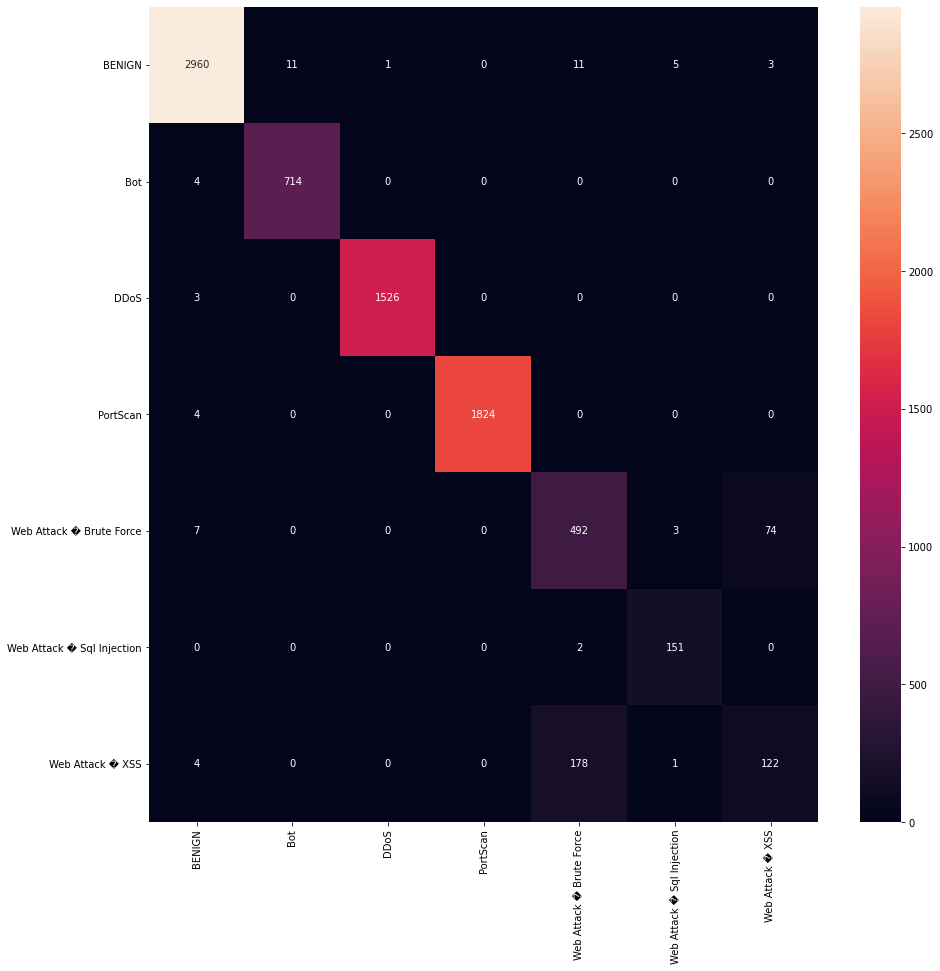

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2991
           1       0.98      0.99      0.99       718
           2       1.00      1.00      1.00      1529
           3       1.00      1.00      1.00      1828
           4       0.72      0.85      0.78       576
           5       0.94      0.99      0.96       153
           6       0.61      0.40      0.48       305

    accuracy                           0.96      8100
   macro avg       0.89      0.89      0.89      8100
weighted avg       0.96      0.96      0.96      8100



============================== Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 0.9585185185185185

Confusion matrix:
 [[2949   16    3    2    9    8    4]
 [   8  710    0    0    0    0    0]
 [   2    0 1527    0    0    0    0]
 [   3    0    0 1825    0    0    0]
 [   4    0    0    0  446    3  123]
 [   5    0    0    0   

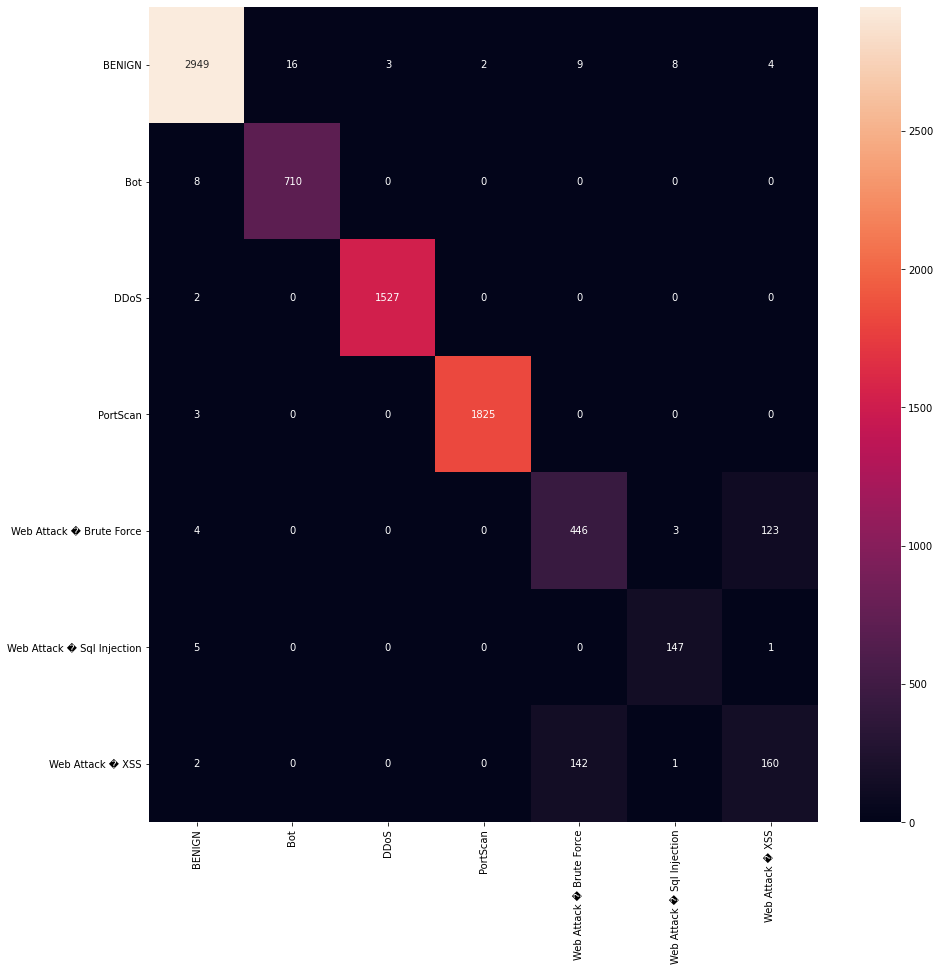

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2991
           1       0.98      0.99      0.98       718
           2       1.00      1.00      1.00      1529
           3       1.00      1.00      1.00      1828
           4       0.75      0.77      0.76       576
           5       0.92      0.96      0.94       153
           6       0.56      0.52      0.54       305

    accuracy                           0.96      8100
   macro avg       0.88      0.89      0.89      8100
weighted avg       0.96      0.96      0.96      8100




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



============================== Support Vector Classifier Model Test Results ==============================

Model Accuracy:
 0.905679012345679

Confusion matrix:
 [[2793  150    5    1   28   14    0]
 [  10  708    0    0    0    0    0]
 [  84    0 1445    0    0    0    0]
 [  15    0    0 1812    1    0    0]
 [  70    0    0    0  504    2    0]
 [  79    0    0    0    0   74    0]
 [  20    0    0    0  283    2    0]]



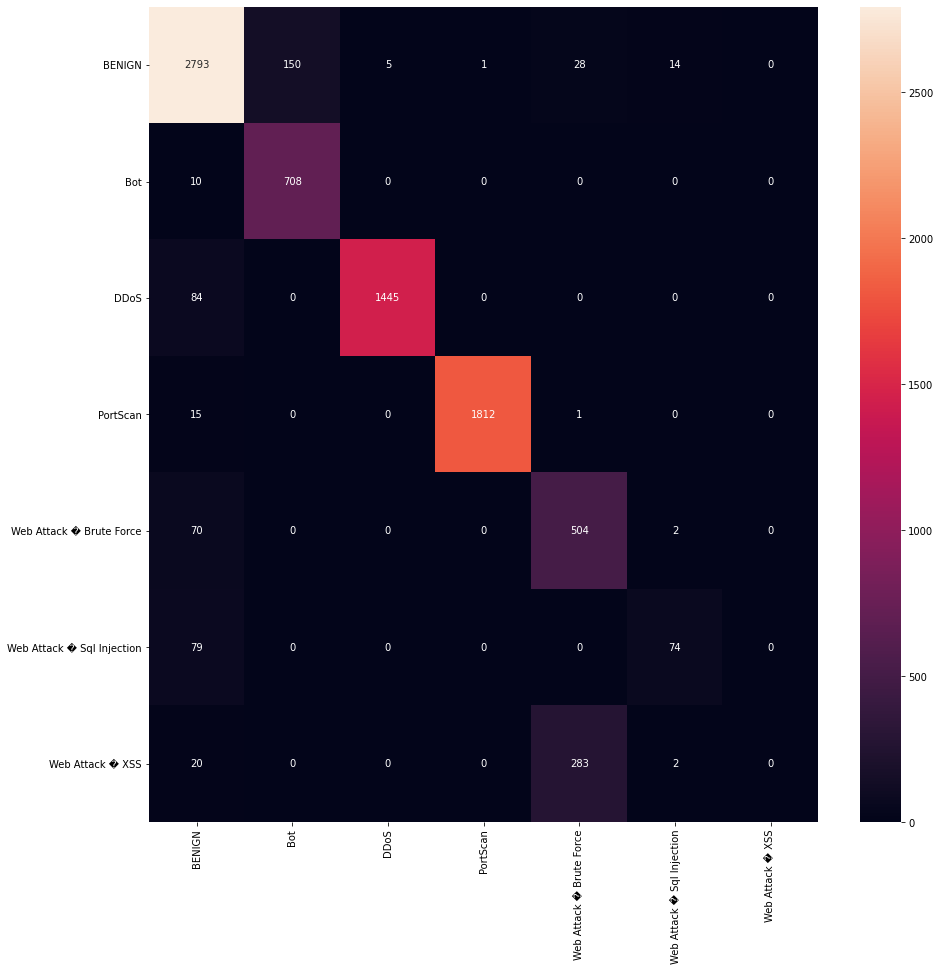

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      2991
           1       0.83      0.99      0.90       718
           2       1.00      0.95      0.97      1529
           3       1.00      0.99      1.00      1828
           4       0.62      0.88      0.72       576
           5       0.80      0.48      0.60       153
           6       0.00      0.00      0.00       305

    accuracy                           0.91      8100
   macro avg       0.74      0.74      0.73      8100
weighted avg       0.88      0.91      0.89      8100




In [83]:
a =1
for i, v in models:
   
    pred = v.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test,pred)
    confusion_matrix = metrics.confusion_matrix(Y_test, pred)
    classification = metrics.classification_report(Y_test, pred)
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    plt.figure(figsize=(15,15))
    map = sns.heatmap(confusion_matrix, annot=True, fmt='.10g',xticklabels=labels,yticklabels=labels)
    plt.show()
    print("Classification report:" "\n", classification) 
    print()    
    a+=1


In [81]:
['BENIGN','Bot','DDoS','PortScan','Web Attack � Brute Force', 'Web Attack � Sql Injection','Web Attack � XSS']

['BENIGN',
 'Bot',
 'DDoS',
 'PortScan',
 'Web Attack � Brute Force',
 'Web Attack � Sql Injection',
 'Web Attack � XSS']